# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
dataset=pd.read_csv("diabetes.csv")

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Univariate Naive Bayes

<AxesSubplot:>

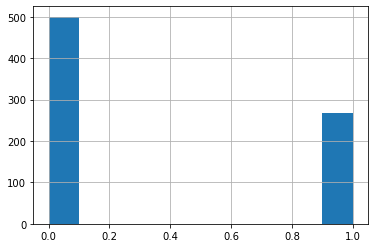

In [5]:
dataset["Outcome"].hist()

## Analyzing the coorelation matrix in order to choose our feature

In [6]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

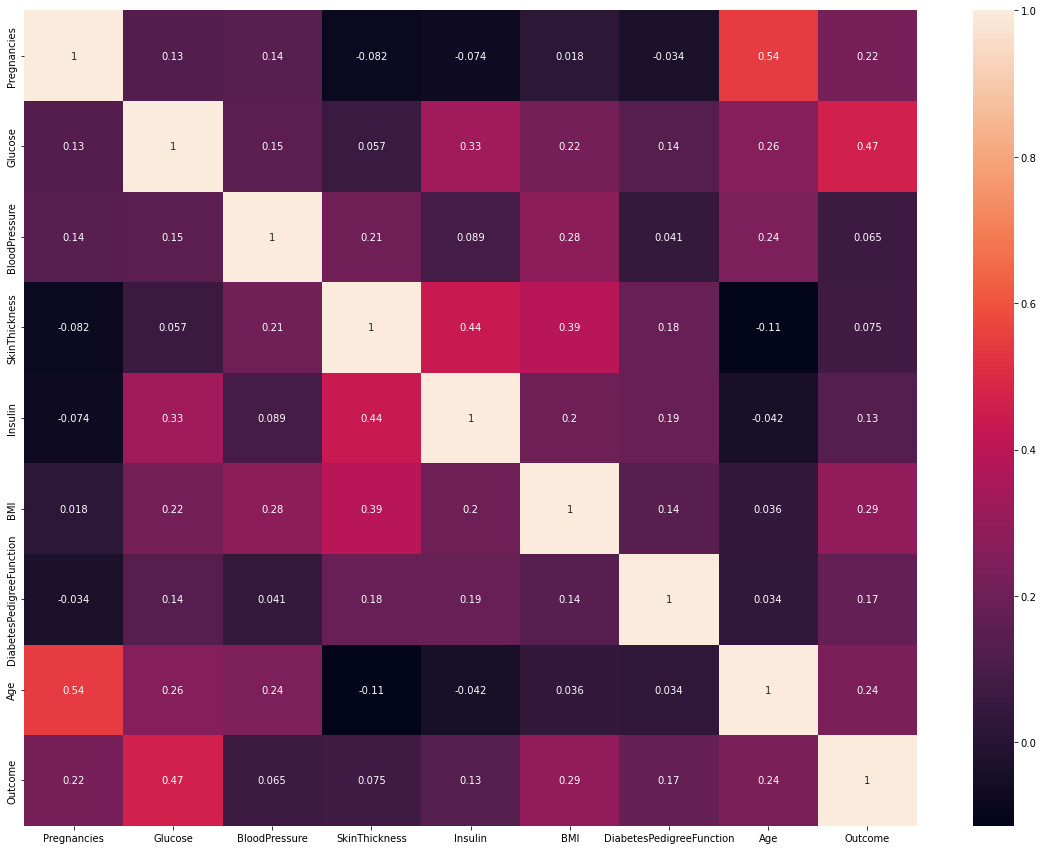

In [7]:
plt.figure(figsize = (20, 15))
corr = dataset.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

### <mark>As from the above table we can see that The feature Glucode is best correlated with our target variable (Outcome) , therefore choosing our univariate feature to be Glucose

In [8]:
dataset=dataset[["Glucose","Outcome"]]
dataset

,Glucose,Outcome
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


## Setting the feature and target variable

In [9]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [10]:
x

array([[148],
       [ 85],
       [183],
       [ 89],
       [137],
       [116],
       [ 78],
       [115],
       [197],
       [125],
       [110],
       [168],
       [139],
       [189],
       [166],
       [100],
       [118],
       [107],
       [103],
       [115],
       [126],
       [ 99],
       [196],
       [119],
       [143],
       [125],
       [147],
       [ 97],
       [145],
       [117],
       [109],
       [158],
       [ 88],
       [ 92],
       [122],
       [103],
       [138],
       [102],
       [ 90],
       [111],
       [180],
       [133],
       [106],
       [171],
       [159],
       [180],
       [146],
       [ 71],
       [103],
       [105],
       [103],
       [101],
       [ 88],
       [176],
       [150],
       [ 73],
       [187],
       [100],
       [146],
       [105],
       [ 84],
       [133],
       [ 44],
       [141],
       [114],
       [ 99],
       [109],
       [109],
       [ 95],
       [146],
       [100],
      

In [11]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Filling the missing values

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x)
x=imputer.transform(x)

In [13]:
x

array([[148.],
       [ 85.],
       [183.],
       [ 89.],
       [137.],
       [116.],
       [ 78.],
       [115.],
       [197.],
       [125.],
       [110.],
       [168.],
       [139.],
       [189.],
       [166.],
       [100.],
       [118.],
       [107.],
       [103.],
       [115.],
       [126.],
       [ 99.],
       [196.],
       [119.],
       [143.],
       [125.],
       [147.],
       [ 97.],
       [145.],
       [117.],
       [109.],
       [158.],
       [ 88.],
       [ 92.],
       [122.],
       [103.],
       [138.],
       [102.],
       [ 90.],
       [111.],
       [180.],
       [133.],
       [106.],
       [171.],
       [159.],
       [180.],
       [146.],
       [ 71.],
       [103.],
       [105.],
       [103.],
       [101.],
       [ 88.],
       [176.],
       [150.],
       [ 73.],
       [187.],
       [100.],
       [146.],
       [105.],
       [ 84.],
       [133.],
       [ 44.],
       [141.],
       [114.],
       [ 99.],
       [10

## Splitting the dataset into training set and test set(test data set 20%)

In [14]:
train=dataset.iloc[:616,:]
x_train=x[:616,:]
x_test=x[616:,:]
y_train=y[:616]
y_test=y[616:]

In [15]:
x_train

array([[148.],
       [ 85.],
       [183.],
       [ 89.],
       [137.],
       [116.],
       [ 78.],
       [115.],
       [197.],
       [125.],
       [110.],
       [168.],
       [139.],
       [189.],
       [166.],
       [100.],
       [118.],
       [107.],
       [103.],
       [115.],
       [126.],
       [ 99.],
       [196.],
       [119.],
       [143.],
       [125.],
       [147.],
       [ 97.],
       [145.],
       [117.],
       [109.],
       [158.],
       [ 88.],
       [ 92.],
       [122.],
       [103.],
       [138.],
       [102.],
       [ 90.],
       [111.],
       [180.],
       [133.],
       [106.],
       [171.],
       [159.],
       [180.],
       [146.],
       [ 71.],
       [103.],
       [105.],
       [103.],
       [101.],
       [ 88.],
       [176.],
       [150.],
       [ 73.],
       [187.],
       [100.],
       [146.],
       [105.],
       [ 84.],
       [133.],
       [ 44.],
       [141.],
       [114.],
       [ 99.],
       [10

In [16]:
x_test

array([[117.],
       [ 68.],
       [112.],
       [119.],
       [112.],
       [ 92.],
       [183.],
       [ 94.],
       [108.],
       [ 90.],
       [125.],
       [132.],
       [128.],
       [ 94.],
       [114.],
       [102.],
       [111.],
       [128.],
       [ 92.],
       [104.],
       [104.],
       [ 94.],
       [ 97.],
       [100.],
       [102.],
       [128.],
       [147.],
       [ 90.],
       [103.],
       [157.],
       [167.],
       [179.],
       [136.],
       [107.],
       [ 91.],
       [117.],
       [123.],
       [120.],
       [106.],
       [155.],
       [101.],
       [120.],
       [127.],
       [ 80.],
       [162.],
       [199.],
       [167.],
       [145.],
       [115.],
       [112.],
       [145.],
       [111.],
       [ 98.],
       [154.],
       [165.],
       [ 99.],
       [ 68.],
       [123.],
       [ 91.],
       [195.],
       [156.],
       [ 93.],
       [121.],
       [101.],
       [ 56.],
       [162.],
       [ 9

In [17]:
y_train

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [18]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [19]:
len(x_train)+len(x_test)

768

In [20]:
len(y_train)+len(y_test)

768

In [21]:
len(x_train)

616

In [22]:
len(y_train)

616

## Defining Naive Bayes Classification

In [23]:
def prior_cal(data, y):
    class_set = sorted(list(data[y].unique()))
    prior = []
    for i in class_set:
        prior.append(len(data[data[y]==i])/len(data))
    return prior

In [24]:
def likelihood_gaussian(data, name, val, y, label):
    feat = list(data.columns)
    data = data[data[y]==label]
    mean, std = data[name].mean(), data[name].std()
    PX_given_Y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((val-mean)**2 / (2 * std**2 )))
    return PX_given_Y

In [25]:
def naive_bayes(data, x, y):
    # extracting feature names
    features = list(data.columns)[:-1]

    # calculate prior
    prior = prior_cal(data, y)

    y_pred = []
    # loop over every data sample
    for x in x:
        # calculate likelihood
        labels = sorted(list(data[y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= likelihood_gaussian(data, features[i], x[i], y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        y_pred.append(np.argmax(post_prob))

    return np.array(y_pred) 

In [26]:
y_pred = naive_bayes(train, x_test, y="Outcome")

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [28]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [29]:
def F1_score(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y[i] == 1 and y_pred[i] == 0:
            fp += 1
        elif y[i] == 0 and y_pred[i] == 1:
            fn += 1
        elif y[i] == 0 and y_pred[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [30]:
print(F1_score(y_test, y_pred))

0.5909090909090909


In [31]:
def accuracy(y,y_pred):
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(y)):
        if y[i]==1 and y_pred[i]==1:
            tp+=1
        elif y[i]==1 and y_pred[i]==0:
            fp+=1
        elif y[i]==0 and y_pred[i]==1:
            fn+=1
        elif y[i]==0 and y_pred[i]==0:
            tn+=1
    accuracy_score=(tp+tn)/(tp+tn+fp+fn)
    return accuracy_score

In [32]:
#calculating the accuracy
accuracy=accuracy(y_test,y_pred)
accuracy

0.7631578947368421

# Multivariate Naive Bayes

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [34]:
dataset = pd.read_csv("diabetes.csv")

In [35]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

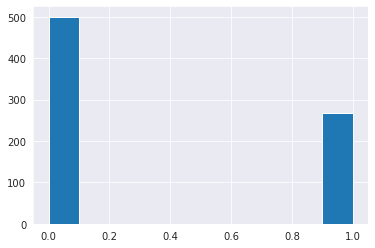

In [38]:
dataset["Outcome"].hist()

In [39]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

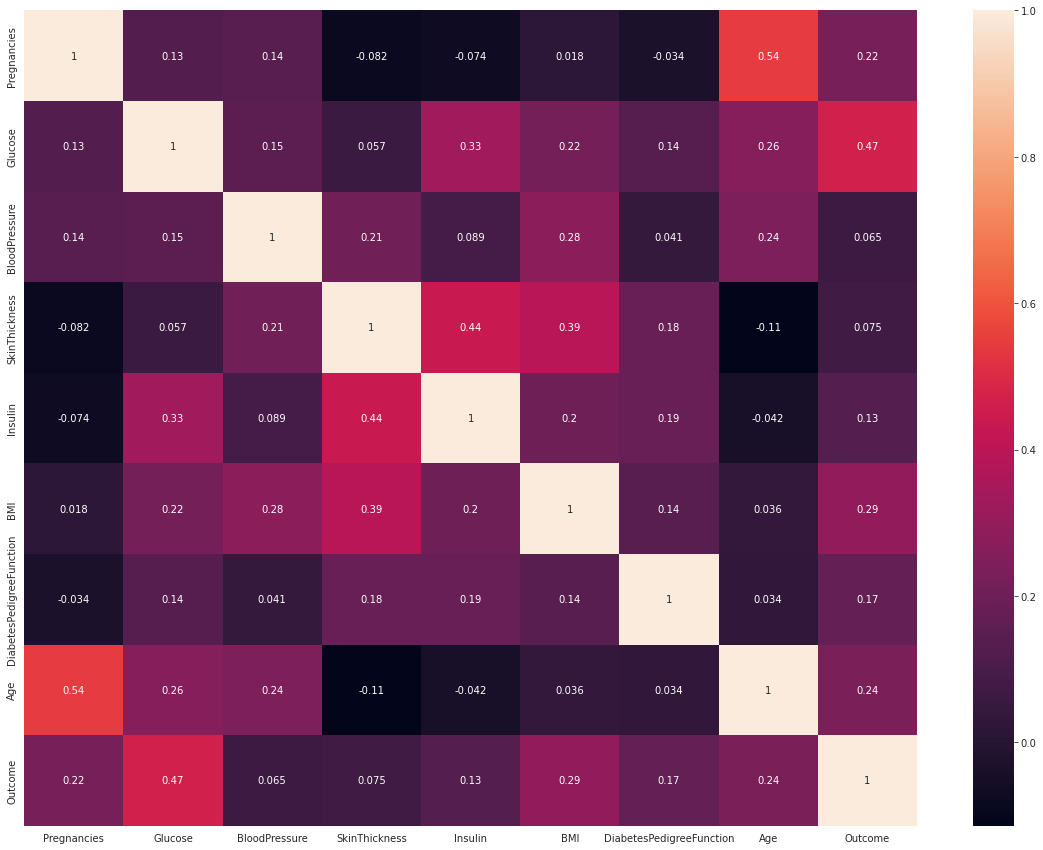

In [40]:
plt.figure(figsize = (20, 15))
corr = dataset.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

In [41]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [42]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [43]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [44]:
train_1=dataset.iloc[:616,:]
x1_train=x[:616,:]
x1_test=x[616:,:]
y1_train=y[:616]
y1_test=y[616:]

In [45]:
train_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1
613,6,105,80,28,0,32.5,0.878,26,0
614,11,138,74,26,144,36.1,0.557,50,1


In [46]:
y_pred = naive_bayes_gaussian(train, X=x_test, Y="Outcome")

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [48]:
def F1_score(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y[i] == 1 and y_pred[i] == 0:
            fp += 1
        elif y[i] == 0 and y_pred[i] == 1:
            fn += 1
        elif y[i] == 0 and y_pred[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [49]:
#calculating the f1_score for checking the accuracy
f1_score=F1_score(y_test,y_pred)

In [50]:
f1_score

0.5909090909090909

In [51]:
def accuracy(y,y_pred):
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(y)):
        if y[i]==1 and y_pred[i]==1:
            tp+=1
        elif y[i]==1 and y_pred[i]==0:
            fp+=1
        elif y[i]==0 and y_pred[i]==1:
            fn+=1
        elif y[i]==0 and y_pred[i]==0:
            tn+=1
    accuracy_score=(tp+tn)/(tp+tn+fp+fn)
    return accuracy_score

In [52]:
#calculating the accuracy
accuracy=accuracy(y_test,y_pred)
accuracy

0.7631578947368421